In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy import stats
from scipy import signal
from math import exp
import processes.foundation as fd
from math import exp, sqrt, pi, erfc
from lmfit import Model
import csv
from statistics import median


In [2]:
waves = fd.get_t1_data(9188, "Card1")

In [103]:
wave1 = waves[0]["waveform"]["values"].nda[1]

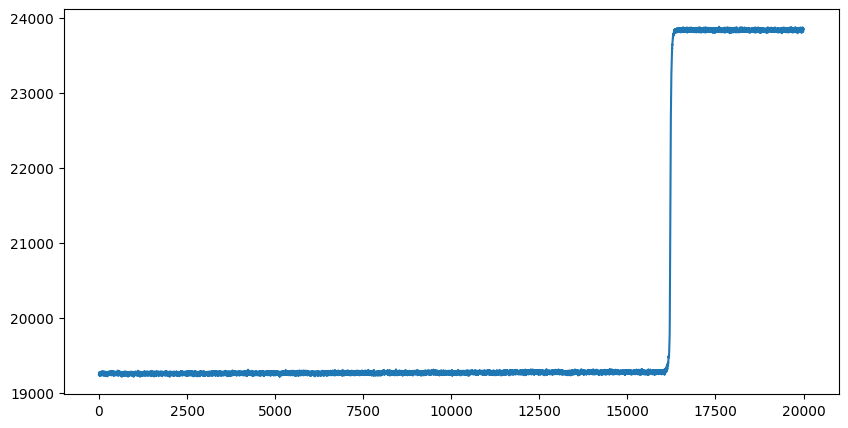

In [34]:
plt.plot(wave1)

In [104]:
import pywt

In [107]:
cDs = pywt.swt(wave1, "haar", level=4)
print(cDs)

[(array([77023.5 , 77027.75, 77034.75, ..., 80466.  , 79320.25, 78172.25]), array([ -41.5 ,  -34.75,  -22.75, ..., 3413.  , 2260.25, 1104.75])), (array([54434.4942293 , 54442.2724039 , 54455.70743274, ...,
       59311.40969915, 57686.12476259, 56057.30429213]), array([ -14.14213562,  -19.09188309,  -26.1629509 , ..., 4888.22917834,
       3256.58028075, 1618.56742214])), (array([38481. , 38483. , 38487.5, ..., 45396. , 43093. , 40783. ]), array([-3.000e+00, -5.000e+00, -3.500e+00, ...,  2.308e+03,  4.615e+03,
        2.305e+03])), (array([27208.0547265 , 27208.0547265 , 27212.29736718, ...,
       33731.82188972, 33734.65031685, 30467.81698777]), array([ 1.41421356e+00, -1.41421356e+00, -2.82842712e+00, ...,
       -1.13137085e+01,  8.48528137e+00,  3.25834805e+03]))]


In [87]:
threshold = np.zeros_like([0,0,0,0])

i = 0
for cD in cDs:
    median_value = median(cD[1])
    median_average_deviation = median([abs(number-median_value) for number in cD[1]])
    sig1 = median_average_deviation/0.6745
    threshold[i] = sig1*np.sqrt(2*np.log(len(wave1)))
    i+=1
print(threshold)

[242 104  42  32]


In [88]:
i = 0
for cD in cDs:
    cD[1][abs(cD[1]) < threshold[i]] = 0.0
    i += 1

print(cDs[0][1])

[   0.      0.      0.   ... 3413.   2260.25 1104.75]


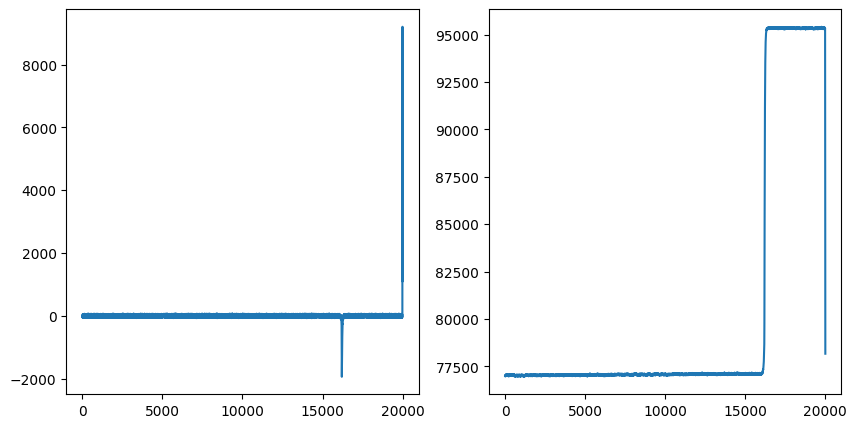

In [108]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(1,2,1)
plt.plot(cDs[0][1])
plt.subplot(1,2,2)
plt.plot(cDs[0][0])

In [90]:
deNoiseWave = pywt.iswt(cDs, "Haar")

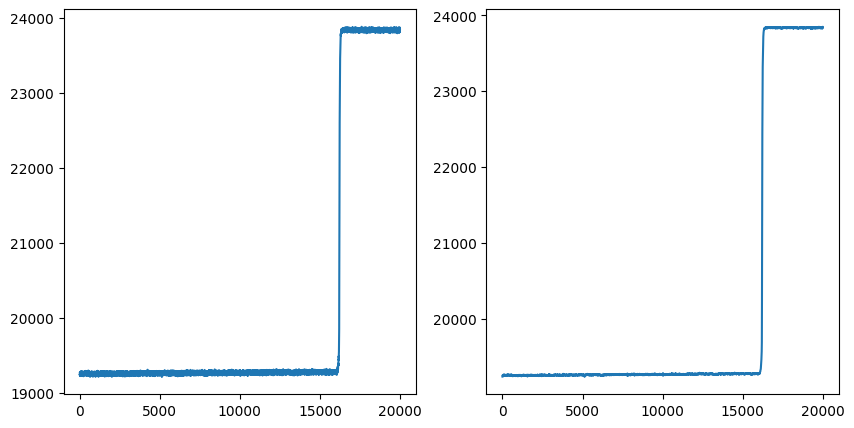

In [93]:
plt.subplot(1,2,1)
plt.plot(wave1)
plt.subplot(1,2,2)
plt.plot(deNoiseWave)

In [97]:
wave1 = wave1 - np.mean(wave1[0:15000])
deNoiseWave = deNoiseWave - np.mean(deNoiseWave[0:15000])

rms1 = np.sqrt(sum(wave1[0:15000]**2)/len(wave1[0:15000]))
rms2 = np.sqrt(sum(deNoiseWave[0:15000]**2)/len(deNoiseWave[0:15000]))

In [98]:
print(rms1)
print(rms2)

16.797631101636547
8.012705351773743


In [99]:
rms2 = rms2*0.0408625 -0.16892

0.1584991724368546